# Project Template :D 

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

(150, 5)
sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

There are no missing values in given dataset

Class distribution: class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


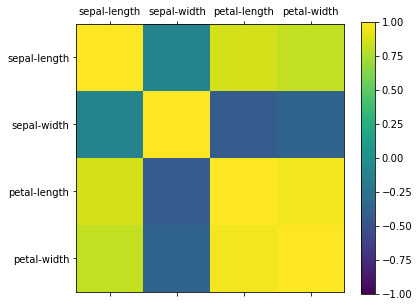

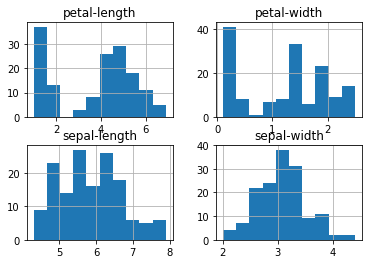

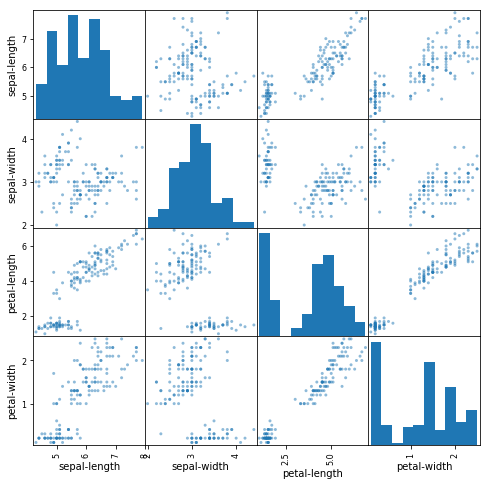

In [3]:
#Peek of our data
#print(dataset.head(20))

#Descriptive Statistics
#print(dataset.describe())

#Data dimentions
print df.shape

#Data types
print df.dtypes

#Checking for missing values
if not df.isnull().any().any():
    print color.PURPLE + "\nThere are no missing values in given dataset\n" + color.END
else:
    print "\nThere are missing values in the dataset...\nExiting..."
    exit
    
#class distribution
print color.BOLD + "Class distribution: "+ color.END + str(df.groupby('class').size())

def plot_correlations(NoElements, labels):
    correlations = df.corr()
    # plot correlation matrix
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,NoElements,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()
    
def plot_histogram(dataset):
    dataset.hist()
    plt.show()

def plot_scatter_matrix(dataset):
    scatter_matrix(dataset,figsize=(8,8))
    plt.show()
    
def visualize_data(dataset,NoElements,labels):    
    plot_correlations(NoElements,labels)
    plot_histogram(dataset)
    plot_scatter_matrix(dataset)
    
visualize_data(df,4,names)

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [4]:
array = df.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]

#Getting all possible label values
class_names=np.unique(Y).tolist()

#Normalization
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print "Normilizing data....."
print(normalizedX[0:5,:])


print "\nStandardizing data....."
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

Normilizing data.....
[[ 0.804  0.552  0.221  0.032]
 [ 0.828  0.507  0.237  0.034]
 [ 0.805  0.548  0.223  0.034]
 [ 0.8    0.539  0.261  0.035]
 [ 0.791  0.569  0.221  0.032]]

Standardizing data.....
[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]
 [-1.507  0.106 -1.284 -1.313]
 [-1.022  1.263 -1.341 -1.313]]


/home/gelou/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

In [5]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)



Creating Validation Dataset

In [6]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

 LR: 0.946667 (+/- 0.085606)
<type 'numpy.ndarray'>
LDA: 0.980000 (+/- 0.040000)
<type 'numpy.ndarray'>
kNN: 0.980000 (+/- 0.060000)
<type 'numpy.ndarray'>
 DT: 0.958889 (+/- 0.050442)
<type 'numpy.ndarray'>
 NB: 0.957778 (+/- 0.051831)
<type 'numpy.ndarray'>
SVM: 0.990000 (+/- 0.030000)
<type 'numpy.ndarray'>


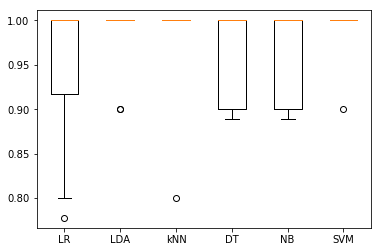

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Evaluation metric:accuracy
seed = 7
scoring = 'accuracy'
kfold = KFold(n_splits=10, random_state=7)


# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

results = []
names   = []


for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))
    print type(cv_results)

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()


## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

In [37]:
#tuning hyperParameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#can tune more parameters--TO DO

param_grid = {'C': uniform()}
model = SVC()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)

print rsearch.best_estimator_

model=SVC(C=bestHyperParameter)
model.fit(X_train, y_train)



SVC(C=0.77991879224011462, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


SVC(C=0.77991879224011462, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

Confusion matrix, without normalization
[[10  0  0]
 [ 0  8  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


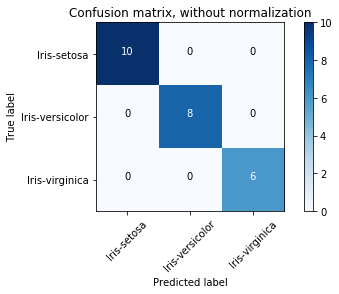

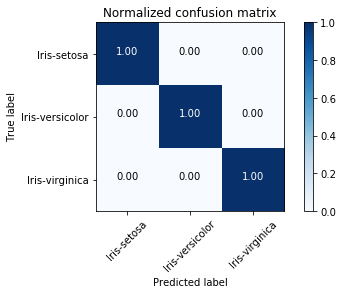

In [38]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred=model.predict(X_val)

#using Scikit-Learn code:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
cnf_matrix = confusion_matrix(y_val, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()